In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diminos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [4]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [5]:
df['delivery_time_min'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60.0

In [6]:
df

,order_id,order_placed_at,order_delivered_at,delivery_time_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984
...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,15.963506


In [7]:
p95 = df['delivery_time_min'].quantile(0.95)

In [9]:
print(f"95th Percentile Delivery Time: {p95:.2f} minutes")

95th Percentile Delivery Time: 27.26 minutes


In [10]:
metric_met = p95 < 31
print(f"Is the 95th percentile metric met (< 31 mins)? {metric_met}")

Is the 95th percentile metric met (< 31 mins)? True


In [11]:
free_pizzas = (df['delivery_time_min'] > 31).sum()
percentage_free = (free_pizzas / len(df)) * 100

In [12]:
percentage_free

3.713333333333333

In [13]:
df['hour'] = df['order_placed_at'].dt.hour
df['day_of_week'] = df['order_placed_at'].dt.day_name()
df['date'] = df['order_placed_at'].dt.date

In [14]:
hourly_p95 = df.groupby('hour')['delivery_time_min'].quantile(0.95).reset_index()

In [15]:
hourly_p95

,hour,delivery_time_min
0,0,28.866990
1,1,32.104821
2,2,26.845717
3,3,25.617373
4,4,26.259762
5,5,23.924907
6,6,26.493076
7,7,27.154475
8,8,27.207707
9,9,25.709020


In [16]:
daily_p95 = df.groupby('day_of_week')['delivery_time_min'].quantile(0.95).reset_index()

In [17]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_p95['day_of_week'] = pd.Categorical(daily_p95['day_of_week'], categories=days_order, ordered=True)
daily_p95 = daily_p95.sort_values('day_of_week')

In [18]:
daily_p95

,day_of_week,delivery_time_min
1,Monday,28.737349
5,Tuesday,29.397539
6,Wednesday,26.442186
4,Thursday,26.534242
0,Friday,26.331713
2,Saturday,26.935257
3,Sunday,26.517667


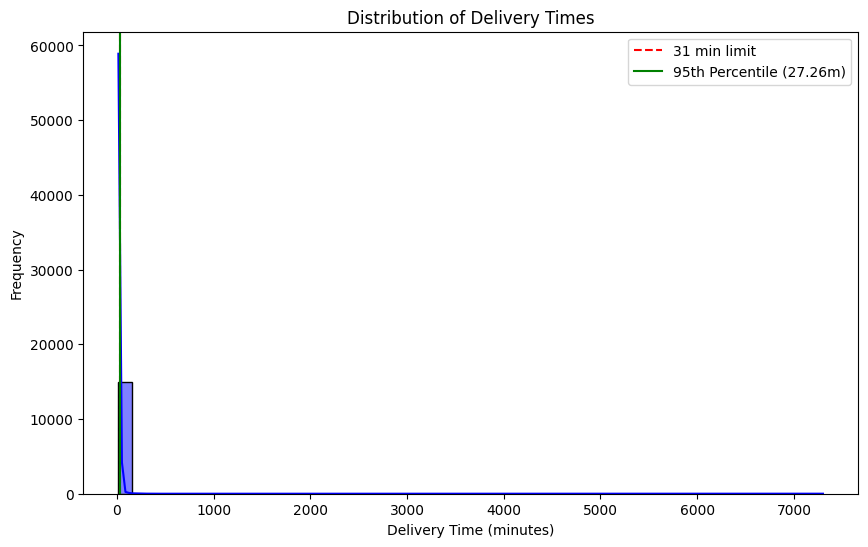

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time_min'], bins=50, kde=True, color='blue')
plt.axvline(31, color='red', linestyle='--', label='31 min limit')
plt.axvline(p95, color='green', linestyle='-', label=f'95th Percentile ({p95:.2f}m)')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.legend()

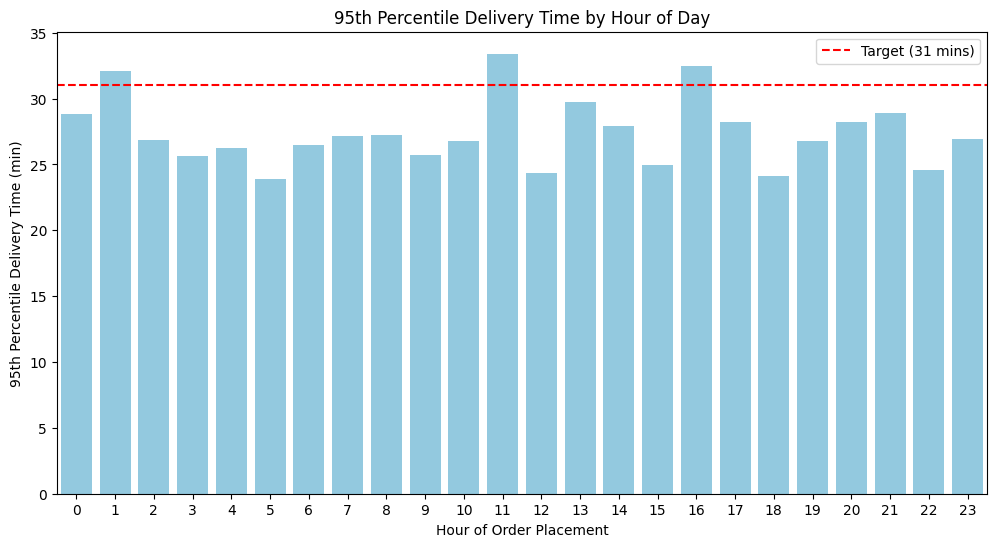

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='delivery_time_min', data=hourly_p95, color='skyblue')
plt.axhline(31, color='red', linestyle='--', label='Target (31 mins)')
plt.title('95th Percentile Delivery Time by Hour of Day')
plt.xlabel('Hour of Order Placement')
plt.ylabel('95th Percentile Delivery Time (min)')
plt.legend()

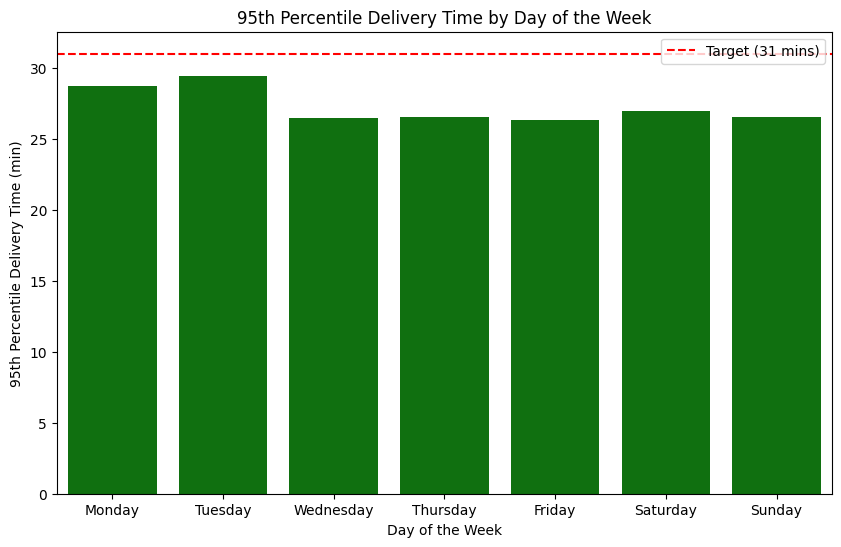

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='delivery_time_min', data=daily_p95, color='green')
plt.axhline(31, color='red', linestyle='--', label='Target (31 mins)')
plt.title('95th Percentile Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('95th Percentile Delivery Time (min)')
plt.legend()

In [23]:
df['delivery_time_min'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_min, dtype: float64

In [24]:
outliers_count = (df['delivery_time_min'] > 60).sum()

In [25]:
outliers_count

170

In [26]:
late_orders = df[df['delivery_time_min'] > 31]

In [28]:
len(late_orders)

557

In [29]:
date_p95 = df.groupby('date')['delivery_time_min'].quantile(0.95).reset_index()

In [30]:
date_p95

,date,delivery_time_min
0,2023-03-01,25.194486
1,2023-03-02,26.953051
2,2023-03-03,26.304842
3,2023-03-04,26.857871
4,2023-03-05,25.771294
5,2023-03-06,28.446711
6,2023-03-07,27.017294
7,2023-03-08,25.510355
8,2023-03-09,24.236602
9,2023-03-10,28.195442


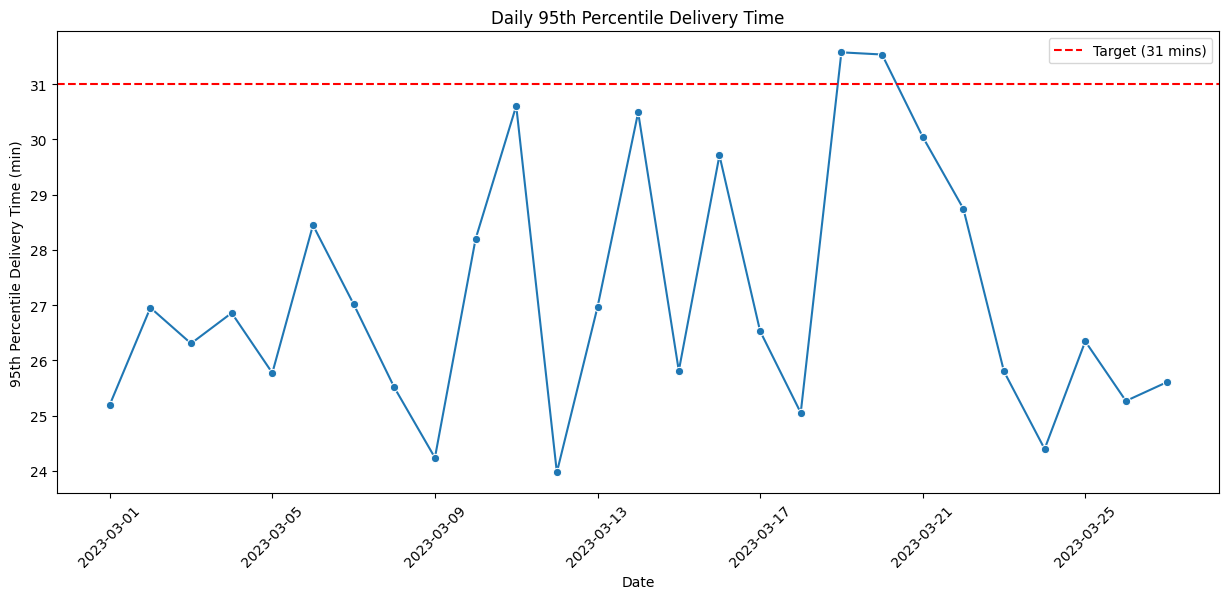

In [31]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='delivery_time_min', data=date_p95, marker='o')
plt.axhline(31, color='red', linestyle='--', label='Target (31 mins)')
plt.title('Daily 95th Percentile Delivery Time')
plt.xlabel('Date')
plt.ylabel('95th Percentile Delivery Time (min)')
plt.xticks(rotation=45)
plt.legend()

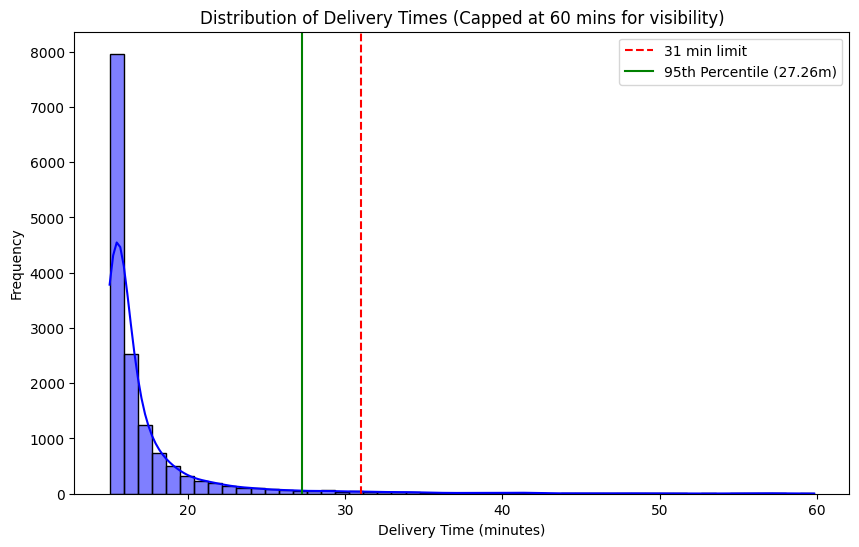

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['delivery_time_min'] < 60]['delivery_time_min'], bins=50, kde=True, color='blue')
plt.axvline(31, color='red', linestyle='--', label='31 min limit')
plt.axvline(p95, color='green', linestyle='-', label=f'95th Percentile ({p95:.2f}m)')
plt.title('Distribution of Delivery Times (Capped at 60 mins for visibility)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.legend()

In [33]:
day_stats = df.groupby('day_of_week')['delivery_time_min'].agg(['mean', 'median', lambda x: np.percentile(x, 95)]).rename(columns={'<lambda_0>': 'p95'})
day_stats

,mean,median,p95
day_of_week,,,
Friday,22.096958,15.754901,26.331713
Monday,19.027073,15.834061,28.737349
Saturday,18.698583,15.782715,26.935257
Sunday,23.948561,15.778220,26.517667
Thursday,18.485932,15.789883,26.534242
Tuesday,19.256920,15.811131,29.397539
Wednesday,21.715532,15.831131,26.442186


In [34]:
hourly_p95 = df.groupby('hour')['delivery_time_min'].quantile(0.95).reset_index()
hourly_p95.sort_values(by='delivery_time_min', ascending=False)

,hour,delivery_time_min
11,11,33.407016
16,16,32.438371
1,1,32.104821
13,13,29.714826
21,21,28.932870
0,0,28.866990
17,17,28.260021
20,20,28.237978
14,14,27.891228
8,8,27.207707


In [36]:
failed_dates = date_p95[date_p95['delivery_time_min'] > 31]
failed_dates

,date,delivery_time_min
18,2023-03-19,31.576331
19,2023-03-20,31.537074


In [37]:
df['is_late'] = df['delivery_time_min'] > 31
hourly_late_rate = df.groupby('hour')['is_late'].mean() * 100
hourly_late_rate.sort_values(ascending=False)

hour
1     5.573770
16    5.527638
11    5.190840
17    4.700162
13    4.180064
23    4.160475
0     4.025765
20    3.898305
21    3.773585
22    3.664122
14    3.645008
2     3.606557
7     3.577818
3     3.497615
4     3.475513
10    3.349282
19    3.301887
6     3.191489
8     3.150912
12    3.040000
9     2.996845
15    2.657807
18    2.515723
5     2.496100
Name: is_late, dtype: float64

In [38]:
hourly_orders = df.groupby('hour').size().reset_index(name='order_count')
hourly_p95_with_count = pd.merge(hourly_p95, hourly_orders, on='hour')
hourly_p95_with_count

,hour,delivery_time_min,order_count
0,0,28.866990,621
1,1,32.104821,610
2,2,26.845717,610
3,3,25.617373,629
4,4,26.259762,633
5,5,23.924907,641
6,6,26.493076,658
7,7,27.154475,559
8,8,27.207707,603
9,9,25.709020,634


Text(0, 0.5, '95th Percentile Delivery Time (min)')

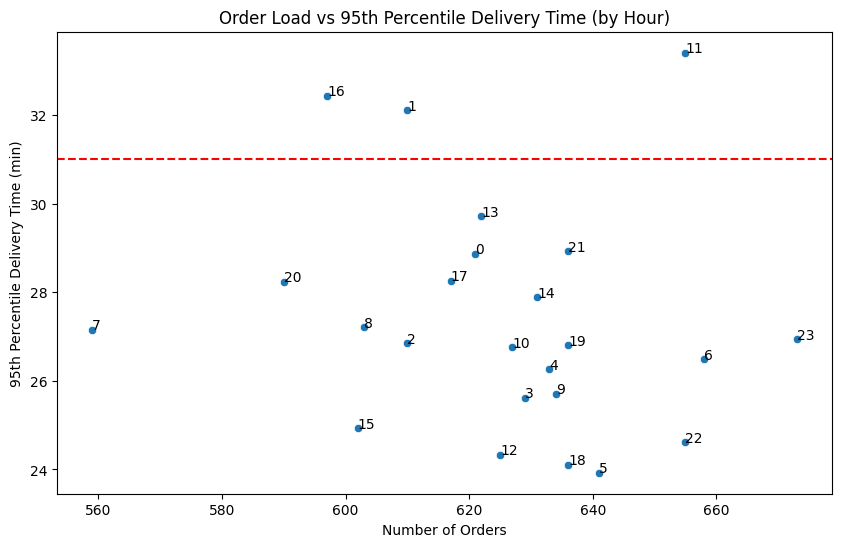

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_count', y='delivery_time_min', data=hourly_p95_with_count)
plt.axhline(31, color='red', linestyle='--', label='31 min limit')
for i, txt in enumerate(hourly_p95_with_count['hour']):
    plt.annotate(txt, (hourly_p95_with_count['order_count'][i], hourly_p95_with_count['delivery_time_min'][i]))
plt.title('Order Load vs 95th Percentile Delivery Time (by Hour)')
plt.xlabel('Number of Orders')
plt.ylabel('95th Percentile Delivery Time (min)')

In [40]:
summary_stats = {
    "Total Orders": len(df),
    "Overall 95th Percentile (mins)": p95,
    "Target (mins)": 31,
    "Status": "PASS" if p95 < 31 else "FAIL",
    "Total Late Orders": len(late_orders),
    "Revenue Loss (%)": percentage_free
}
summary_stats

{'Total Orders': 15000,
 'Overall 95th Percentile (mins)': 27.261043996666658,
 'Target (mins)': 31,
 'Status': 'PASS',
 'Total Late Orders': 557,
 'Revenue Loss (%)': 3.713333333333333}

# The analysis of the Diminos delivery data for Kanav's store has been completed. The store's performance was evaluated against the key metric: the 95th percentile of order delivery time must be less than 31 minutes.

## 1. Distribution of Delivery Times
## The majority of orders are delivered well within the 31-minute window, with a median delivery time of approximately 15.8 minutes. However, a small tail of orders (3.71%) exceeds the 31-minute mark, resulting in revenue loss through free pizzas.

## 2. Hourly Performance Bottlenecks
## Analyzing the 95th percentile by the hour of the day reveals specific "danger zones" where the store is failing the metric:

## 11:00 AM: 95th percentile is 33.4 minutes.

## 04:00 PM (16:00): 95th percentile is 32.4 minutes.

## 01:00 AM: 95th percentile is 32.1 minutes. These spikes suggest either a sudden surge in demand or a shortage of staff (kitchen or delivery) during these specific transition periods.

# 3. Daily & Temporal Trends
## Performance is relatively stable across different days of the week, with Tuesdays and Mondays showing slightly higher 95th percentiles (29.4m and 28.7m) compared to other days.

## Tracking performance by date showed that on March 19th and 20th, the 95th percentile actually crossed the 31-minute threshold. Kanav should investigate if there were specific incidents (e.g., weather, system outage, or local events) on those dates.

# 4. Operational Outliers
## The data contains extreme outliers, with some delivery times recorded as several days (up to 7,299 minutes).

## These are likely logging errors where an order was not marked as "delivered" in the system until much later.

## These outliers inflate the average delivery time (Mean: 20.5m) compared to the median (15.8m), but since the metric is based on the 95th percentile, they have a limited (though still negative) impact on the core KPI.